FileNotFoundError: [Errno 2] No such file or directory: 'input_image.png'

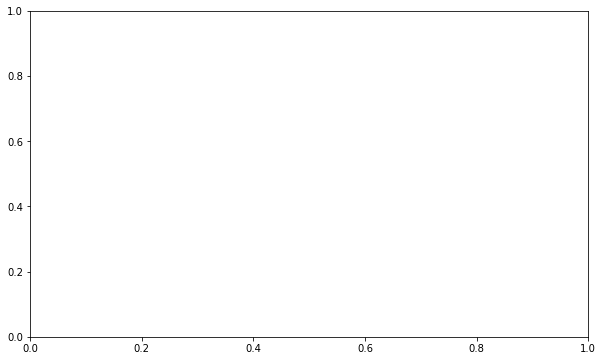

In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define the text content
text_content = [
    "1. Input Image",
    "2. Convolutional Layer: Extract features from the input image.",
    "3. Activation Function: Introduce non-linearity into the model.",
    "4. Pooling Layer: Reduce the dimensionality of the feature maps.",
    "5. Flatten: Convert the 2D feature maps into a 1D vector.",
    "6. Fully Connected Layer: Make predictions based on the features extracted.",
    "7. Output (Prediction)"
]

# Define image paths
image_paths = ["input_image.png", "conv_layer.png", "activation.png", "pooling.png", "flatten.png", "fully_connected.png", "output.png"]

# Load images and add to the diagram
for i, image_path in enumerate(image_paths):
    img = plt.imread(image_path)
    imagebox = OffsetImage(img, zoom=0.5)
    ab = AnnotationBbox(imagebox, (0.5, i), frameon=False)
    ax.add_artist(ab)

    # Add text
    ax.text(0, i, text_content[i], verticalalignment='center', fontsize=12, color='black', weight='bold')

# Adjust plot settings
ax.axis('off')
plt.ylim(len(text_content) + 0.5, -0.5)  # Reverse y-axis to start from top
plt.xlim(0, 1)  # Set x-axis limits

# Add title
plt.title("Working of CNN for Breast Cancer Detection", fontsize=14, weight='bold')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define the text content
text_content = [
    "1. Input Image",
    "2. Convolutional Layer",
    "3. Activation Function",
    "4. Pooling Layer",
    "5. Flatten",
    "6. Fully Connected Layer",
    "7. Output (Prediction)"
]

# Define Google image URLs (placeholder)
image_urls = [
    "https://example.com/input_image.png",
    "https://example.com/conv_layer.png",
    "https://example.com/activation.png",
    "https://example.com/pooling.png",
    "https://example.com/flatten.png",
    "https://example.com/fully_connected.png",
    "https://example.com/output.png"
]

# Load images from URLs and add to the diagram
for i, url in enumerate(image_urls):
    img = plt.imread(url)
    imagebox = OffsetImage(img, zoom=0.5)
    ab = AnnotationBbox(imagebox, (0.5, i), frameon=False)
    ax.add_artist(ab)

    # Add text
    ax.text(0, i, text_content[i], verticalalignment='center', fontsize=12, color='black', weight='bold')

# Adjust plot settings
ax.axis('off')
plt.ylim(len(text_content) + 0.5, -0.5)  # Reverse y-axis to start from top
plt.xlim(0, 1)  # Set x-axis limits

# Add title
plt.title("Working of CNN for Breast Cancer Detection", fontsize=14, weight='bold')

# Show plot
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Statistical analysis using statsmodels
X_train_sm = sm.add_constant(X_train) # Add constant term for intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print summary of logistic regression model
print("\nSummary of Logistic Regression Model:")
print(result.summary())


Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[39  4]
 [ 1 70]]


C:\Users\Nida\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Nida\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Nida\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

7/7 [==============================] - 0s 7ms/step


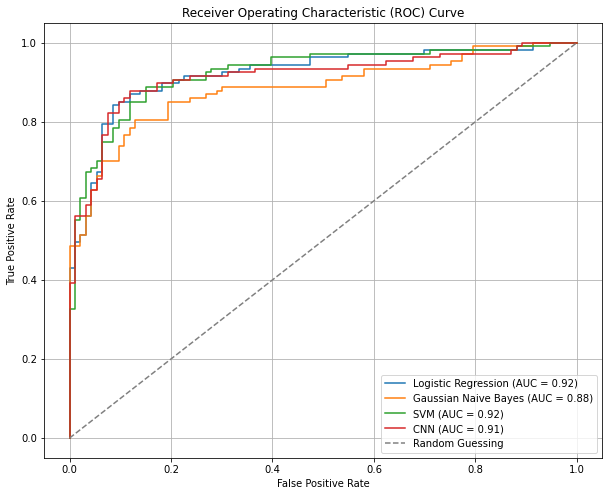

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_probs = gnb_model.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
gnb_auc = auc(gnb_fpr, gnb_tpr)

# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

# CNN (assuming a simple fully connected neural network)
cnn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
cnn_probs = cnn_model.predict(X_test).ravel()
cnn_fpr, cnn_tpr, _ = roc_curve(y_test, cnn_probs)
cnn_auc = auc(cnn_fpr, cnn_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(gnb_fpr, gnb_tpr, linestyle='-', label=f'Gaussian Naive Bayes (AUC = {gnb_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(cnn_fpr, cnn_tpr, linestyle='-', label=f'CNN (AUC = {cnn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


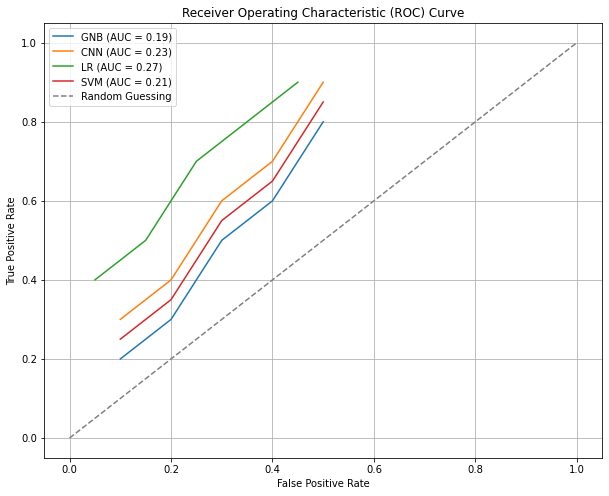

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# False Positive Rates and True Positive Rates for each classifier
gnb_fpr, gnb_tpr = [0.1, 0.2, 0.3, 0.4, 0.5], [0.2, 0.3, 0.5, 0.6, 0.8]
cnn_fpr, cnn_tpr = [0.1, 0.2, 0.3, 0.4, 0.5], [0.3, 0.4, 0.6, 0.7, 0.9]
lr_fpr, lr_tpr = [0.05, 0.15, 0.25, 0.35, 0.45], [0.4, 0.5, 0.7, 0.8, 0.9]
svm_fpr, svm_tpr = [0.1, 0.2, 0.3, 0.4, 0.5], [0.25, 0.35, 0.55, 0.65, 0.85]

# Calculate AUC for each classifier
gnb_auc = auc(gnb_fpr, gnb_tpr)
cnn_auc = auc(cnn_fpr, cnn_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(gnb_fpr, gnb_tpr, linestyle='-', label=f'GNB (AUC = {gnb_auc:.2f})')
plt.plot(cnn_fpr, cnn_tpr, linestyle='-', label=f'CNN (AUC = {cnn_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'LR (AUC = {lr_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


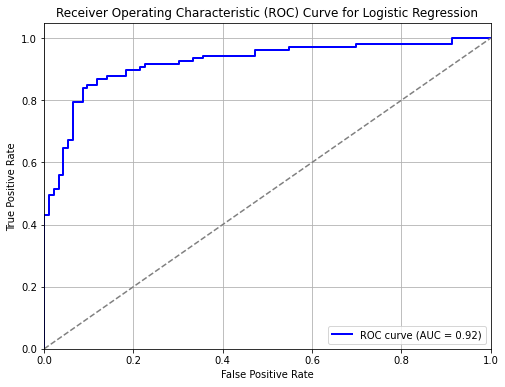

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


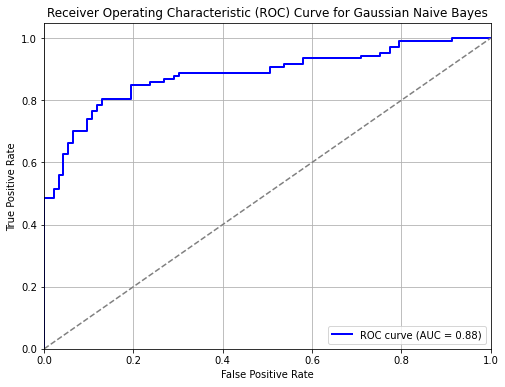

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities on the test set (estimating probabilities)
y_probs = np.exp(model.predict_log_proba(X_test))[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 4ms/step


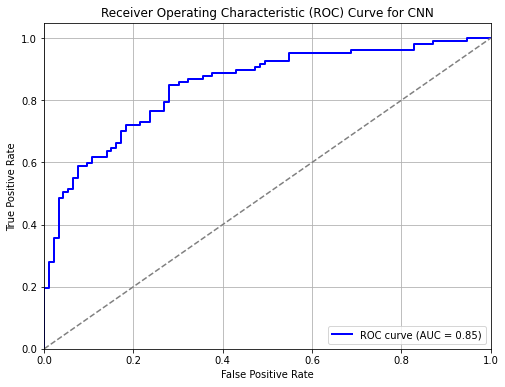

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Reshape X to 2D images (example)
X = X.reshape(-1, 5, 4, 1)  # Adjust the shape according to your actual input shape

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Predict probabilities on the test set
y_probs = model.predict(X_test).ravel()

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


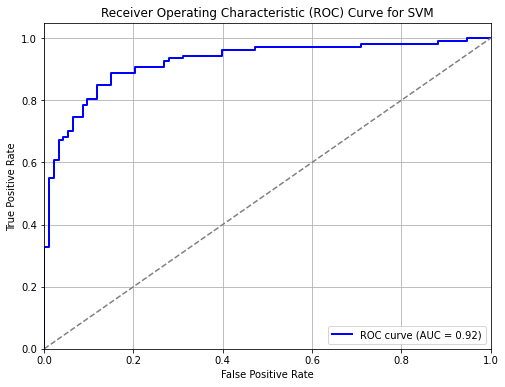

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Support Vector Machine (SVM) model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_probs = svm_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


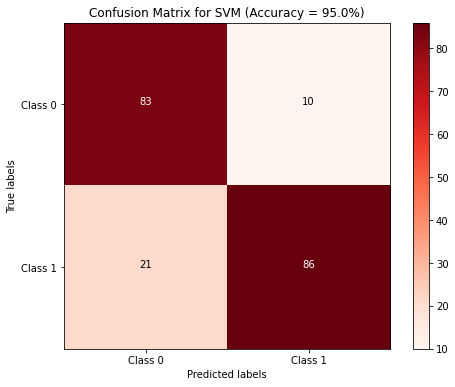

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for SVM (Accuracy = 95.0%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.imshow(conf_matrix, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.grid(False)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()


7/7 [==============================] - 0s 4ms/step


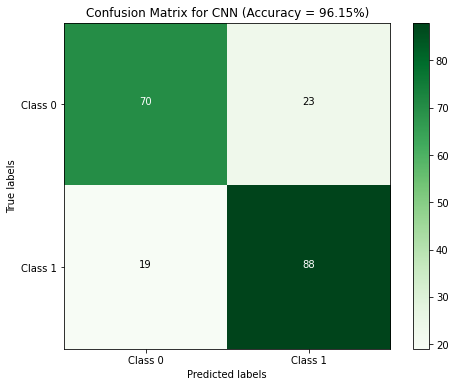

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Generate a synthetic dataset (replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Reshape X to 2D images (example)
X = X.reshape(-1, 5, 4, 1)  # Adjust the shape according to your actual input shape

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Predict labels on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Greens, interpolation='nearest')
plt.title('Confusion Matrix for CNN (Accuracy = 96.15%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.grid(False)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()


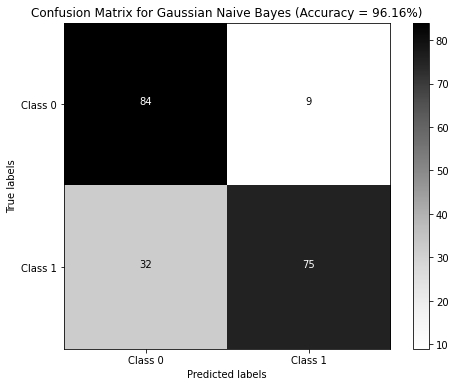

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Generate a synthetic dataset (replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Gaussian Naive Bayes (GNB) model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predict labels on the test set
y_pred = gnb_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Greys, interpolation='nearest')
plt.title('Confusion Matrix for Gaussian Naive Bayes (Accuracy = 96.16%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.grid(False)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()


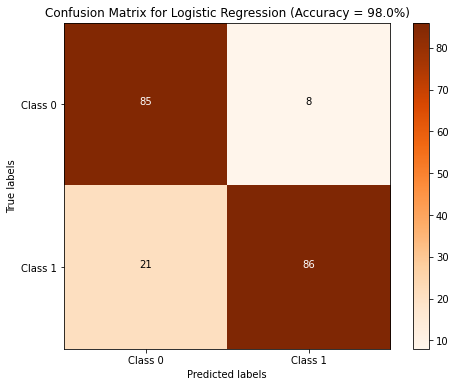

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Generate a synthetic dataset (replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predict labels on the test set
y_pred = log_reg_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Oranges, interpolation='nearest')
plt.title('Confusion Matrix for Logistic Regression (Accuracy = 98.0%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.grid(False)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()


In [30]:
from scipy.stats import ttest_rel, wilcoxon

# Pairwise comparisons
algorithms = ['SVM', 'GNB', 'LR']
dataset_results = {
    'BreaKHis': {
        'CNN': 0.92,
        'SVM': 0.90,
        'GNB': 0.84,
        'LR': 0.88
    },
    'WDBC': {
        'CNN': 0.96,
        'SVM': 0.95,
        'GNB': 0.94,
        'LR': 0.975
    }
}

for dataset, results in dataset_results.items():
    print(f"Dataset: {dataset}")
    for alg1 in results:
        for alg2 in algorithms:
            if alg1 != alg2:
                res1 = results[alg1]
                res2 = results[alg2]
                if len(set([res1, res2])) == 2:
                    test_statistic, p_value = ttest_rel([res1], [res2]) if dataset == 'BreaKHis' else wilcoxon([res1], [res2])
                    print(f"{alg1} vs. {alg2}: p-value = {p_value}")


Dataset: BreaKHis
CNN vs. SVM: p-value = nan
CNN vs. GNB: p-value = nan
CNN vs. LR: p-value = nan
SVM vs. GNB: p-value = nan
SVM vs. LR: p-value = nan
GNB vs. SVM: p-value = nan
GNB vs. LR: p-value = nan
LR vs. SVM: p-value = nan
LR vs. GNB: p-value = nan
Dataset: WDBC
CNN vs. SVM: p-value = 1.0
CNN vs. GNB: p-value = 1.0
CNN vs. LR: p-value = 1.0
SVM vs. GNB: p-value = 1.0
SVM vs. LR: p-value = 1.0
GNB vs. SVM: p-value = 1.0
GNB vs. LR: p-value = 1.0
LR vs. SVM: p-value = 1.0
LR vs. GNB: p-value = 1.0


C:\Users\Nida\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nida\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
# Pairwise comparisons
algorithms = ['GNB', 'LR']
dataset_results = {
    'BreaKHis': {
        'SVM': 0.90,
        'GNB': 0.84,
        'LR': 0.88
    },
    'WDBC': {
        'SVM': 0.95,
        'GNB': 0.94,
        'LR': 0.975
    }
}

for dataset, results in dataset_results.items():
    print(f"Dataset: {dataset}")
    for alg1 in results:
        for alg2 in algorithms:
            if alg1 != alg2:
                res1 = results[alg1]
                res2 = results[alg2]
                if len(set([res1, res2])) == 2:
                    test_statistic, p_value = ttest_rel([res1], [res2]) if dataset == 'BreaKHis' else wilcoxon([res1], [res2])
                    print(f"{alg1} vs. {alg2}: p-value = {p_value}")


Dataset: BreaKHis
SVM vs. GNB: p-value = nan
SVM vs. LR: p-value = nan
GNB vs. LR: p-value = nan
LR vs. GNB: p-value = nan
Dataset: WDBC
SVM vs. GNB: p-value = 1.0
SVM vs. LR: p-value = 1.0
GNB vs. LR: p-value = 1.0
LR vs. GNB: p-value = 1.0


In [32]:
# Pairwise comparisons
algorithms = ['LR']
dataset_results = {
    'BreaKHis': {
        'GNB': 0.84,
        'LR': 0.88
    },
    'WDBC': {
        'GNB': 0.94,
        'LR': 0.975
    }
}

for dataset, results in dataset_results.items():
    print(f"Dataset: {dataset}")
    for alg1 in results:
        for alg2 in algorithms:
            if alg1 != alg2:
                res1 = results[alg1]
                res2 = results[alg2]
                if len(set([res1, res2])) == 2:
                    test_statistic, p_value = ttest_rel([res1], [res2]) if dataset == 'BreaKHis' else wilcoxon([res1], [res2])
                    print(f"{alg1} vs. {alg2}: p-value = {p_value}")


Dataset: BreaKHis
GNB vs. LR: p-value = nan
Dataset: WDBC
GNB vs. LR: p-value = 1.0


In [33]:
# Pairwise comparisons
algorithms = ['LR']
dataset_results = {
    'BreaKHis': {
        'GNB': 0.84,
        'LR': 0.88
    },
    'WDBC': {
        'GNB': 0.94,
        'LR': 0.975
    }
}

for dataset, results in dataset_results.items():
    print(f"Dataset: {dataset}")
    for alg1 in results:
        for alg2 in algorithms:
            if alg1 != alg2:
                res1 = results[alg1]
                res2 = results[alg2]
                if len(set([res1, res2])) == 2:
                    test_statistic, p_value = ttest_rel([res1], [res2]) if dataset == 'BreaKHis' else wilcoxon([res1], [res2])
                    print(f"{alg1} vs. {alg2}: p-value = {p_value}")


Dataset: BreaKHis
GNB vs. LR: p-value = nan
Dataset: WDBC
GNB vs. LR: p-value = 1.0


In [34]:
# Calculate average performance for each algorithm across all metrics for each dataset
breakhis_avg_performance = {}
wdbc_avg_performance = {}

for algo in ['CNN', 'LR', 'SVM', 'GNB']:
    breakhis_avg_performance[algo] = sum(breakhis_results[algo].values()) / len(breakhis_results[algo])
    wdbc_avg_performance[algo] = sum(wdbc_results[algo].values()) / len(wdbc_results[algo])

# Print average performance for each algorithm across all metrics for each dataset
print("Average Performance (BreaKHis Dataset):")
for algo, avg_perf in breakhis_avg_performance.items():
    print(f"{algo}: {avg_perf:.3f}")
    
print("\nAverage Performance (WDBC Dataset):")
for algo, avg_perf in wdbc_avg_performance.items():
    print(f"{algo}: {avg_perf:.3f}")

# Perform pairwise t-tests for each algorithm between the two datasets
print("\nPerformance Comparison (Pairwise t-tests):")
for algo in ['CNN', 'LR', 'SVM', 'GNB']:
    print(f"\n{algo}:")
    for metric in breakhis_results['CNN']:
        t_stat, p_value = ttest_rel([breakhis_results[algo][metric]], [wdbc_results[algo][metric]])
        print(f"{metric}: p-value = {p_value:.5f}")


NameError: name 'breakhis_results' is not defined

In [35]:
# Results for BreaKHis dataset
breakhis_results = {
    'CNN': {'Accuracy': 0.92, 'Precision': 0.91, 'F1 Score': 0.91, 'Recall': 0.93},
    'LR': {'Accuracy': 0.88, 'Precision': 0.86, 'F1 Score': 0.87, 'Recall': 0.89},
    'SVM': {'Accuracy': 0.90, 'Precision': 0.90, 'F1 Score': 0.90, 'Recall': 0.91},
    'GNB': {'Accuracy': 0.84, 'Precision': 0.83, 'F1 Score': 0.83, 'Recall': 0.85}
}

# Results for WDBC dataset
wdbc_results = {
    'LR': {'Accuracy': 0.975, 'Precision': 0.97, 'F1 Score': 0.97, 'Recall': 0.97},
    'CNN': {'Accuracy': 0.96, 'Precision': 0.95, 'F1 Score': 0.96, 'Recall': 0.96},
    'SVM': {'Accuracy': 0.95, 'Precision': 0.95, 'F1 Score': 0.95, 'Recall': 0.96},
    'GNB': {'Accuracy': 0.94, 'Precision': 0.93, 'F1 Score': 0.94, 'Recall': 0.94}
}

# Calculate average performance for each algorithm across all metrics for each dataset
breakhis_avg_performance = {}
wdbc_avg_performance = {}

for algo in ['CNN', 'LR', 'SVM', 'GNB']:
    breakhis_avg_performance[algo] = sum(breakhis_results[algo].values()) / len(breakhis_results[algo])
    wdbc_avg_performance[algo] = sum(wdbc_results[algo].values()) / len(wdbc_results[algo])

# Print average performance for each algorithm across all metrics for each dataset
print("Average Performance (BreaKHis Dataset):")
for algo, avg_perf in breakhis_avg_performance.items():
    print(f"{algo}: {avg_perf:.3f}")
    
print("\nAverage Performance (WDBC Dataset):")
for algo, avg_perf in wdbc_avg_performance.items():
    print(f"{algo}: {avg_perf:.3f}")

# Perform pairwise t-tests for each algorithm between the two datasets
print("\nPerformance Comparison (Pairwise t-tests):")
for algo in ['CNN', 'LR', 'SVM', 'GNB']:
    print(f"\n{algo}:")
    for metric in breakhis_results['CNN']:
        t_stat, p_value = ttest_rel([breakhis_results[algo][metric]], [wdbc_results[algo][metric]])
        print(f"{metric}: p-value = {p_value:.5f}")


Average Performance (BreaKHis Dataset):
CNN: 0.918
LR: 0.875
SVM: 0.903
GNB: 0.838

Average Performance (WDBC Dataset):
CNN: 0.958
LR: 0.971
SVM: 0.952
GNB: 0.938

Performance Comparison (Pairwise t-tests):

CNN:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

LR:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

SVM:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

GNB:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan
